## Projeto Titanic 

 #### Objetivo principal: realizar todas as fases do Machine learning, ou seja, EDA e predição, utilizando diversos algoritmos de classificação da biblioteca SciKit-learn
 #### Objetivos secundários: 
 - Criar um storytelling dos dados
 - Utilizar métricas tradicionais (F1-score, acurácia, AUC, sensibilidade, especificidade, matriz de confusão, recall, precisão, etc.) 
 - Demonstrar graficamente features importance e outros métricas com Matplotlib e Seaborn
 

### Bibliotecas e configurações 

In [3]:
# Manipulação de dados (nossos velhos conhecidos, só o numpy a gente não usou)
import pandas as pd
import numpy as np
# Visualizações (virgem, que tanto de biblioteca!!! trouxe várias pra deixar pra vocês brincarem!)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Estatísticas 
from scipy import stats
import warnings

# Configurações
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# Configurações do matplotlib (calma que amanhã tem dataviz! hoje é só uns gráficos simples)
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Dataframe Titanic

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv") ## sempre o link da pasta raw
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 📘 Dicionário de Dados — Titanic

| Coluna        | Tipo          | Descrição                                                   |
| ------------- | ------------- | ----------------------------------------------------------- |
| `PassengerId` | Inteiro       | Identificador único do passageiro                           |
| `Survived`    | Binário (0/1) | Sobreviveu? (0 = Não, 1 = Sim)                              |
| `Pclass`      | Inteiro (1–3) | Classe do bilhete (1 = Primeira, 2 = Segunda, 3 = Terceira) |
| `Name`        | String        | Nome completo do passageiro                                 |
| `Sex`         | String        | Sexo (`male`, `female`)                                     |
| `Age`         | Float         | Idade em anos                                               |
| `SibSp`       | Inteiro       | Número de irmãos/cônjuges a bordo                           |
| `Parch`       | Inteiro       | Número de pais/filhos a bordo                               |
| `Ticket`      | String        | Número do bilhete                                           |
| `Fare`        | Float         | Valor pago pela passagem                                    |
| `Cabin`       | String        | Número da cabine                                            |
| `Embarked`    | Categórica    | Porto de embarque                                           |


### 🚢 Valores possíveis de Embarked

| Código | Porto       |
| ------ | ----------- |
| `C`    | Cherbourg   |
| `Q`    | Queenstown  |
| `S`    | Southampton |


### Data wrangling 

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Estatística descritiva das variáveis quantitativas 

In [10]:
df[["Age","Parch", "Fare"]].describe()

,Age,Parch,Fare
count,714.000000,891.000000,891.000000
mean,29.699118,0.381594,32.204208
std,14.526497,0.806057,49.693429
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,7.910400
50%,28.000000,0.000000,14.454200
75%,38.000000,0.000000,31.000000
max,80.000000,6.000000,512.329200


### Histograma das variáveis quantitativas 

#### Idade

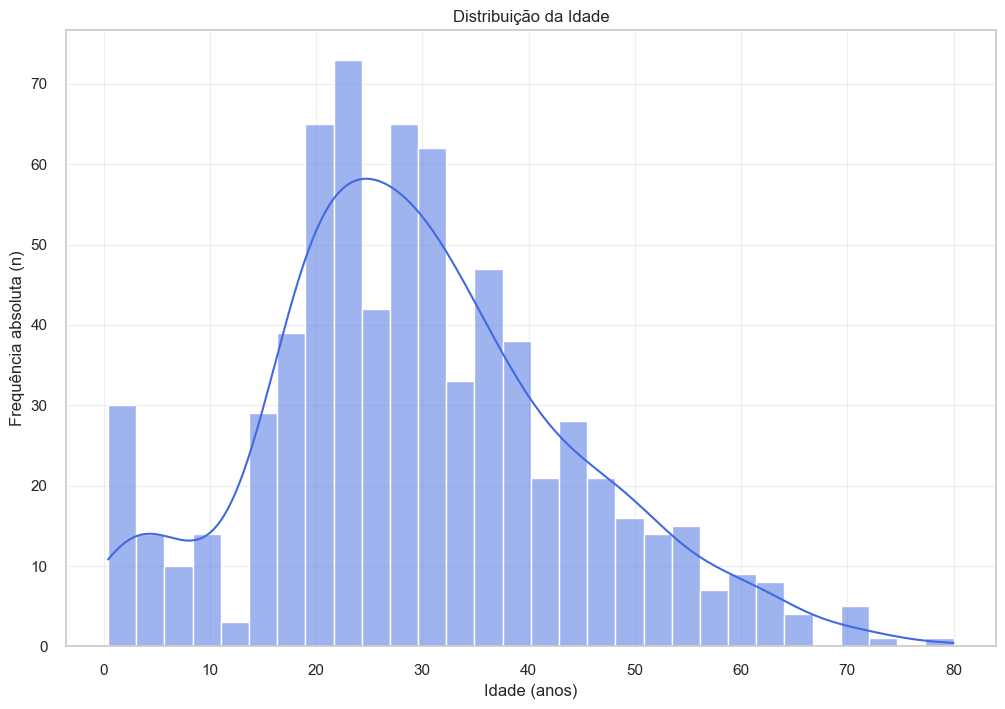

In [15]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Age", bins=30, kde=True, color="royalblue")
plt.title("Distribuição da Idade")
plt.xlabel("Idade (anos)")
plt.ylabel("Frequência absoluta (n)")
plt.show()

#### Valor do bilhete

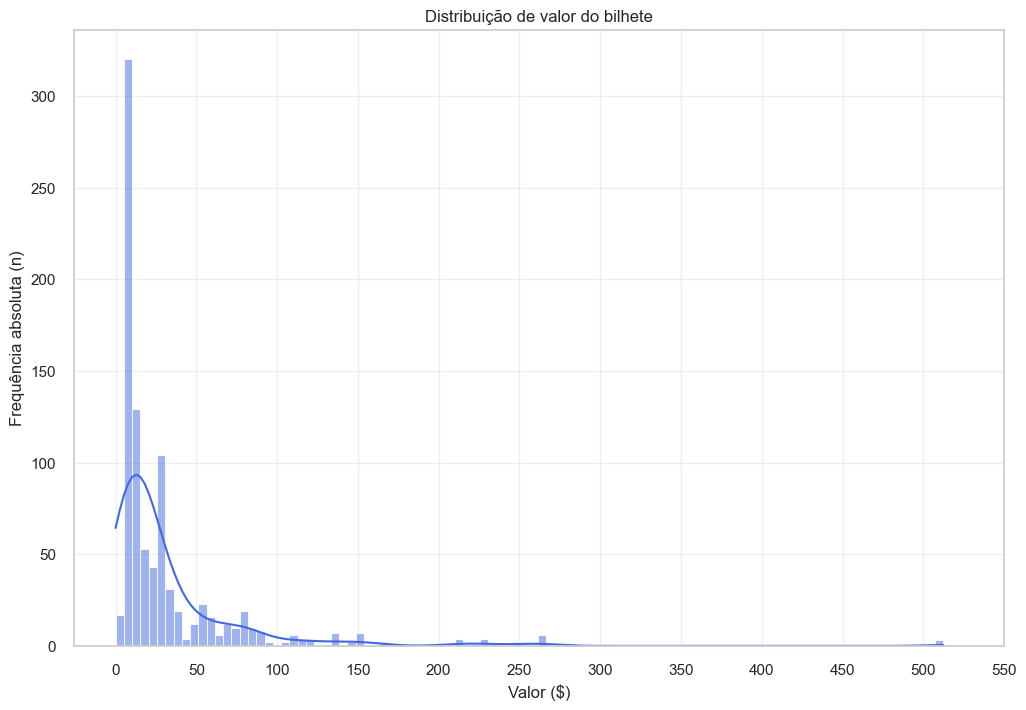

In [21]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Fare", bins=100, kde=True, color="royalblue")
plt.xticks(np.arange(0, df["Fare"].max()+50, 50))
plt.title("Distribuição de valor do bilhete")
plt.xlabel("Valor ($)")
plt.ylabel("Frequência absoluta (n)")
plt.show()

#### Número de filhos

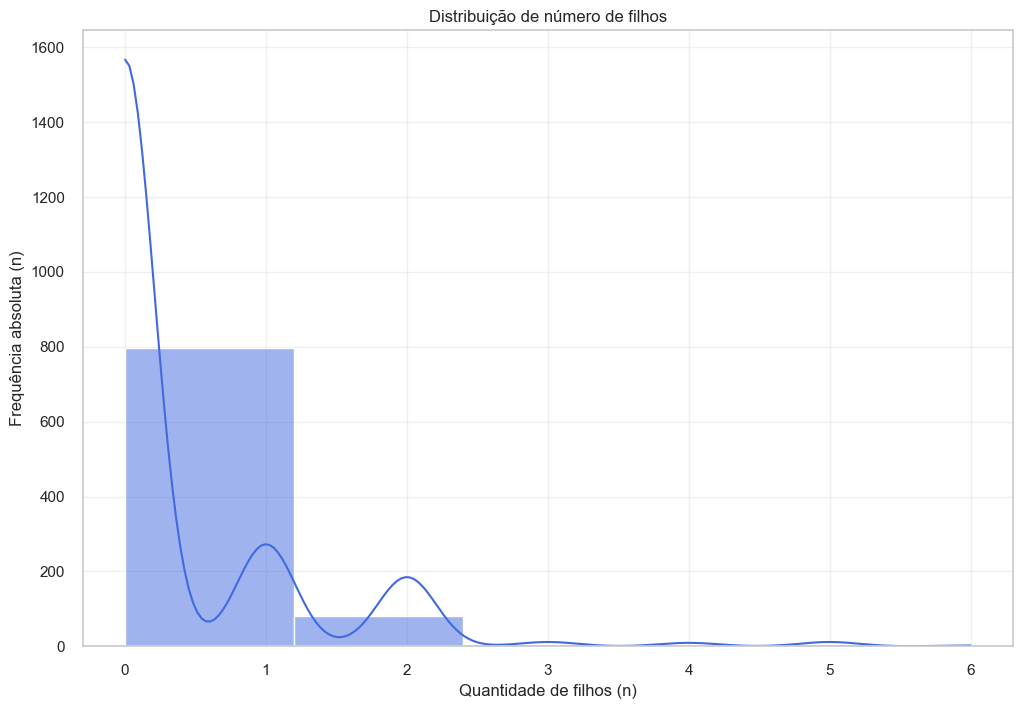

In [28]:
sns.set_theme(style="whitegrid")
sns.histplot(data=df, x="Parch", bins=5, kde=True, color="royalblue")
plt.xticks(np.arange(0, df["Parch"].max()+1, 1))
plt.title("Distribuição de número de filhos")
plt.xlabel("Quantidade de filhos (n)")
plt.ylabel("Frequência absoluta (n)")
plt.show()

In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

# ---------------------
# Separando o dataset

X = df[['idade', 'cidade']]
y = df['target']

# ---------------------
# Dividir primeiro
# ---------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------
# Definir  tipo de colunas
# ---------------------
num_cols = ['idade']
cat_cols = ['cidade']

# ---------------------
# Pipeline variáveis numérica
# ---------------------
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# ---------------------
# Pipeline variável categórica
# ---------------------
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# ---------------------
#  ColumnTransformer
# ---------------------
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

# ---------------------
#  Pipeline final
# ---------------------
model = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# ---------------------
#  Treinar
# ---------------------
model.fit(X_train, y_train)

# ---------------------
# Avaliar
# ---------------------
score = model.score(X_test, y_test)
print("Acurácia:", score)

Acurácia: 1.0


### Suport Vector Machine (SVN)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score